In [ ]:
#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px 
# from dataprep.eda import create_report
# from sklearn.impute import KNNImputer

from datetime  import datetime,timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from mlxtend.feature_selection import SequentialFeatureSelector  as SFS


In [ ]:
#import data

In [2]:
data=pd.read_csv(r'C:\Users\RYZEN\Anaconda\Untitled Folder\Capstone+Project+1\Credit_card.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1459,5068324,F,N,Y,0,171000.0,Working,Higher education,Married,House / apartment,-18348.0,-3853,1,0,0,0,High skill tech staff,2
787,5113472,M,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-19200.0,-346,1,0,1,0,High skill tech staff,2
1433,5062016,F,N,N,0,180000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-11342.0,-2389,1,0,0,0,NaN,1
926,5088055,F,N,Y,0,216000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-17937.0,-3054,1,0,0,0,Medicine staff,1
1341,5036219,F,N,Y,0,99000.0,Working,Secondary / secondary special,Married,House / apartment,-15590.0,-890,1,0,0,0,Sales staff,2


In [5]:
# create_report(df)

In [6]:
df.shape

(1548, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000


In [9]:
data2=pd.read_csv(r'C:\\Users\\RYZEN\\Anaconda\\Untitled Folder\\Capstone+Project+1\\Credit_card_label.csv')

In [10]:
df2=pd.DataFrame(data2)

In [11]:
df2.sample(5)

,Ind_ID,label
359,5029725,0
604,5115662,0
430,5022571,0
654,5135489,0
178,5086062,0


In [12]:
df2.isnull().sum()

Ind_ID    0
label     0
dtype: int64

In [13]:
df.shape

(1548, 18)

In [14]:
df2['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

In [ ]:
#merging the tables 

In [15]:
result=pd.merge(df,df2,how='left',on=['Ind_ID','Ind_ID'])

In [16]:
result.sample(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
753,5036648,F,N,N,0,202500.0,Commercial associate,Higher education,Married,House / apartment,-11328.0,-3761,1,0,0,0,High skill tech staff,2,0
1236,5022449,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570.0,-1978,1,0,0,1,Core staff,1,0
522,5041307,F,Y,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23118.0,365243,1,0,1,0,NaN,2,0
1287,5085768,M,Y,Y,1,405000.0,State servant,Higher education,Married,House / apartment,-11532.0,-4917,1,0,0,0,Managers,3,0
1323,5126121,F,Y,N,0,72000.0,Working,Secondary / secondary special,Married,House / apartment,-15185.0,-227,1,1,1,0,Medicine staff,2,0


In [17]:
result.shape

(1548, 19)

In [18]:
result.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# data is imbalanced

In [19]:
result['label'].value_counts()

0    1373
1     175
Name: label, dtype: int64

In [20]:
result['GENDER'].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

In [ ]:
# visualization

<Axes: xlabel='GENDER', ylabel='count'>

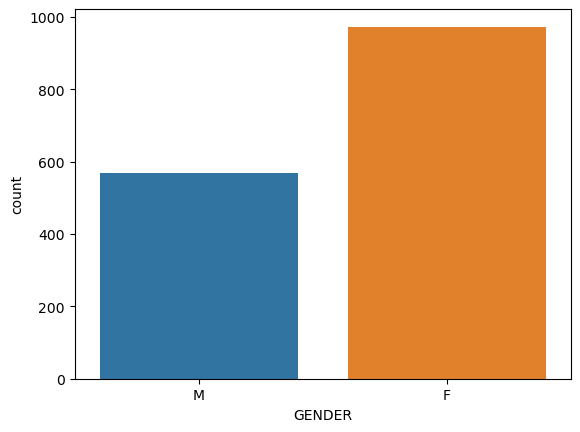

In [21]:
sns.countplot(data=result,x='GENDER')

<Axes: xlabel='Car_Owner', ylabel='count'>

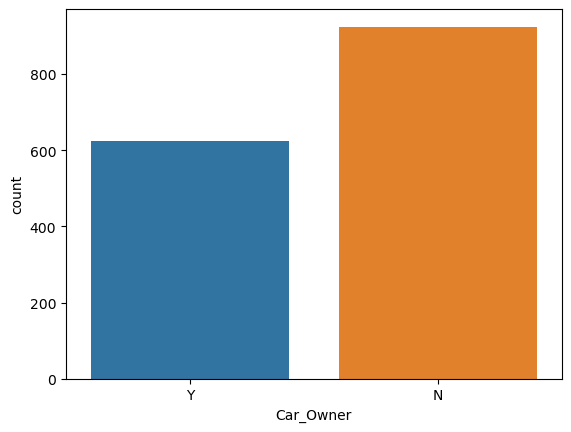

In [22]:
sns.countplot(data=result,x='Car_Owner')

<Axes: xlabel='Propert_Owner', ylabel='count'>

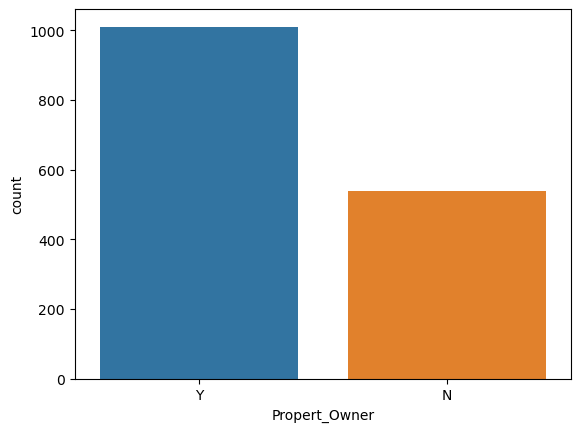

In [23]:
sns.countplot(data=result,x='Propert_Owner')

<Axes: xlabel='CHILDREN', ylabel='count'>

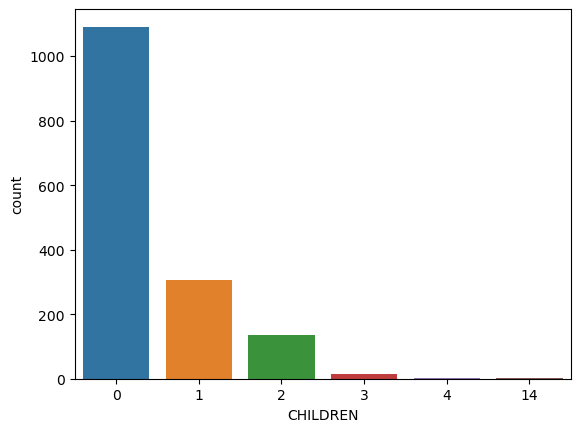

In [24]:
sns.countplot(data=result,x='CHILDREN')

<Axes: xlabel='Type_Income', ylabel='count'>

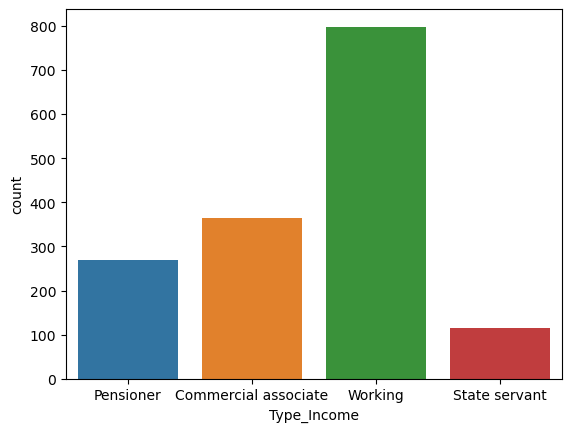

In [25]:
sns.countplot(data=result,x='Type_Income')

3.9245642452364167

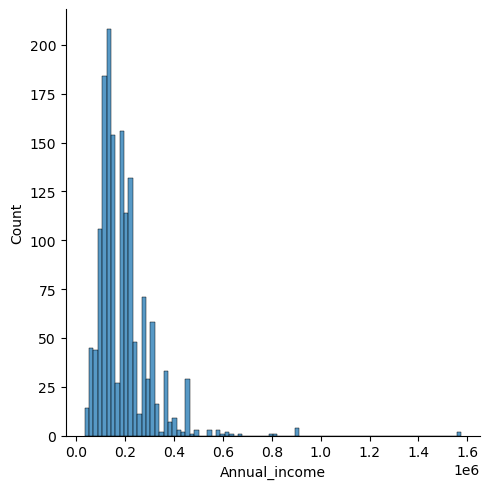

In [26]:
sns.displot(result,x='Annual_income')
result['Annual_income'].skew()

In [27]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [28]:
for uni_col in result.columns:
    print(f"{uni_col} : {result[uni_col].unique()} \n {result[uni_col].value_counts()}\n")

Ind_ID : [5008827 5009744 5009746 ... 5115992 5118219 5053790] 
 5008827    1
5142163    1
5024925    1
5143560    1
5068648    1
          ..
5148792    1
5142290    1
5095324    1
5118270    1
5053790    1
Name: Ind_ID, Length: 1548, dtype: int64

GENDER : ['M' 'F' nan] 
 F    973
M    568
Name: GENDER, dtype: int64

Car_Owner : ['Y' 'N'] 
 N    924
Y    624
Name: Car_Owner, dtype: int64

Propert_Owner : ['Y' 'N'] 
 Y    1010
N     538
Name: Propert_Owner, dtype: int64

CHILDREN : [ 0  1  2  4  3 14] 
 0     1091
1      305
2      134
3       16
4        1
14       1
Name: CHILDREN, dtype: int64

Annual_income : [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000

categorical columns: gender,car_owner,property_owner,children,type_income, education ,martital_status,housing_type,type_occupation,family
can be ignored : mobile,

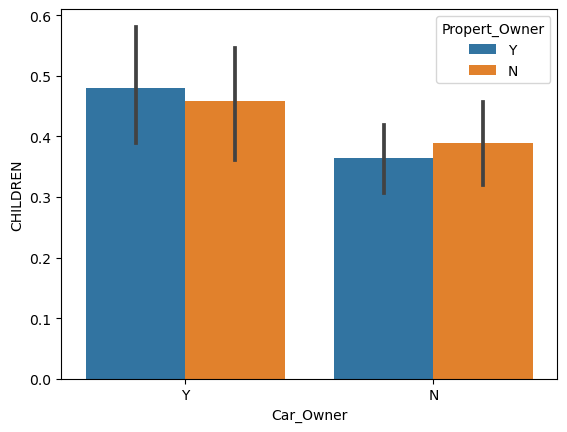

In [29]:
fig=sns.barplot(result,y='CHILDREN',x='Car_Owner',hue='Propert_Owner')


<Axes: xlabel='Type_Income', ylabel='Annual_income'>

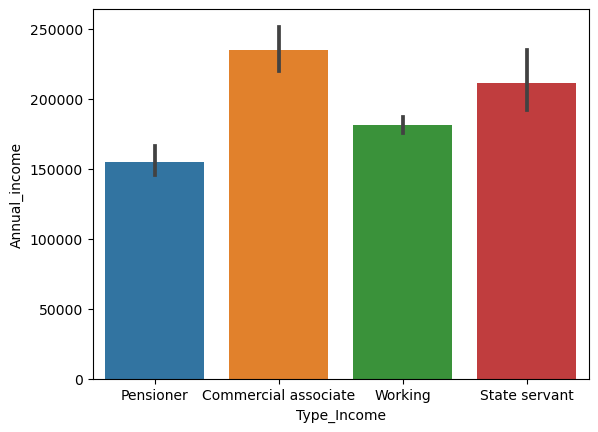

In [30]:
sns.barplot(result,y='Annual_income',x='Type_Income')

In [31]:
result.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [32]:
result_1a=result.copy()

In [ ]:
#data cleaning 

In [33]:
result_1a=result_1a.drop(['Ind_ID','Mobile_phone'],axis=1)

In [34]:
result_1a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,0,0,0,Managers,2,0
1544,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,0,0,0,Accountants,1,0
1545,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,0,0,0,Managers,4,0
1546,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,0,Drivers,2,0


In [35]:
result_1a['Car_Owner'].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [ ]:
#encoding

In [36]:
result_1a['Car_Owner']=np.where(result_1a['Car_Owner']=='Y',1,0)
result_1a['Propert_Owner']=np.where(result_1a['Propert_Owner']=="Y",1,0)

In [37]:
result_1a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,1,0,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,1,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,0,0,0,Managers,2,0
1544,F,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,0,0,0,Accountants,1,0
1545,M,1,1,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,0,0,0,Managers,4,0
1546,M,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,0,Drivers,2,0


In [38]:
result_1a['EDUCATION'].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [39]:
d={'Lower secondary':0,'Secondary / secondary special':1,'Incomplete higher':2,'Higher education':3,'Academic degree':4}
result_1a['EDUCATION']=result_1a['EDUCATION'].map(d)

In [40]:
result_1a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,M,1,1,0,180000.0,Pensioner,3,Married,House / apartment,-18772.0,365243,0,0,0,NaN,2,1
1,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
2,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,NaN,-586,1,1,0,NaN,2,1
3,F,1,0,0,NaN,Commercial associate,3,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
4,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,-13557.0,-586,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,1,0,NaN,Commercial associate,3,Married,House / apartment,-11957.0,-2182,0,0,0,Managers,2,0
1544,F,0,0,0,225000.0,Commercial associate,2,Single / not married,House / apartment,-10229.0,-1209,0,0,0,Accountants,1,0
1545,M,1,1,2,180000.0,Working,3,Married,House / apartment,-13174.0,-2477,0,0,0,Managers,4,0
1546,M,1,0,0,270000.0,Working,1,Civil marriage,House / apartment,-15292.0,-645,1,1,0,Drivers,2,0


In [ ]:
# feature addition 

In [41]:


current_date = datetime.now()
result_1a['Days_Before_Current1'] = -result_1a['Birthday_count'].astype(float)
result_1a['Birthdate'] = current_date - pd.to_timedelta(result_1a['Days_Before_Current1'], unit='D')
result_1a['Age'] = (current_date - result_1a['Birthdate']).astype('<m8[Y]')

# Calculate employment start date
result_1a['Days_Before_Current2'] = -result_1a['Employed_days'].astype(float)
result_1a['Employment_Start_Date'] = current_date - pd.to_timedelta(result_1a['Days_Before_Current2'], unit='D')
result_1a["Employee_Exp"]=((current_date-result_1a['Employment_Start_Date']).dt.days//365.25).astype(int)



In [42]:
result_1a.sample(5)
result_1a['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [43]:
result_1a=result_1a.drop(result_1a[['Birthday_count','Days_Before_Current1','Birthdate','Employed_days','Days_Before_Current2','Employment_Start_Date']],axis=1)

In [44]:
result_1a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Age,Employee_Exp
0,M,1,1,0,180000.0,Pensioner,3,Married,House / apartment,0,0,0,NaN,2,1,51.0,169
1,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,0,NaN,2,1,37.0,1
2,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,0,NaN,2,1,NaN,1
3,F,1,0,0,NaN,Commercial associate,3,Married,House / apartment,1,1,0,NaN,2,1,37.0,1
4,F,1,0,0,315000.0,Commercial associate,3,Married,House / apartment,1,1,0,NaN,2,1,37.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,1,0,NaN,Commercial associate,3,Married,House / apartment,0,0,0,Managers,2,0,32.0,5
1544,F,0,0,0,225000.0,Commercial associate,2,Single / not married,House / apartment,0,0,0,Accountants,1,0,28.0,3
1545,M,1,1,2,180000.0,Working,3,Married,House / apartment,0,0,0,Managers,4,0,36.0,6
1546,M,1,0,0,270000.0,Working,1,Civil marriage,House / apartment,1,1,0,Drivers,2,0,41.0,1


In [45]:
result_1a['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [46]:
col=pd.get_dummies(result_1a["Type_Income"],columns=result_1a['Type_Income'],drop_first=True)

In [47]:
col

,Pensioner,State servant,Working
0,1,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1543,0,0,0
1544,0,0,0
1545,0,0,1
1546,0,0,1


In [48]:
result_1a=pd.concat([result_1a,col],axis=1)


In [49]:
result_1a=result_1a.drop(result_1a[['Type_Income']],axis=1)

In [50]:
col=pd.get_dummies(result_1a["Marital_status"],columns=result_1a['Marital_status'],drop_first=True)

In [51]:
result_1a=pd.concat([result_1a,col],axis=1)

In [52]:
result_1a=result_1a.drop(['Marital_status'],axis=1)

In [53]:
result_1a['Housing_type'].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [54]:
col=pd.get_dummies(result_1a["Housing_type"],columns=result_1a['Housing_type'])
result_1a=pd.concat([result_1a,col],axis=1)

In [55]:
result_1a=result_1a.drop(['Housing_type'],axis=1)

In [56]:
result_1a

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Type_Occupation,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,M,1,1,0,180000.0,3,0,0,0,NaN,...,1,0,0,0,0,1,0,0,0,0
1,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
2,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
3,F,1,0,0,NaN,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
4,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,0,1,0,NaN,3,0,0,0,Managers,...,1,0,0,0,0,1,0,0,0,0
1544,F,0,0,0,225000.0,2,0,0,0,Accountants,...,0,0,1,0,0,1,0,0,0,0
1545,M,1,1,2,180000.0,3,0,0,0,Managers,...,1,0,0,0,0,1,0,0,0,0
1546,M,1,0,0,270000.0,1,1,1,0,Drivers,...,0,0,0,0,0,1,0,0,0,0


In [57]:
result_1a['GENDER']=result_1a['GENDER'].fillna(result_1a['GENDER'].mode())

In [58]:
result_1a.sample(5)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Type_Occupation,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
810,M,1,0,1,99000.0,1,0,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
351,M,1,0,1,112500.0,1,0,1,0,Laborers,...,1,0,0,0,0,1,0,0,0,0
1389,F,0,1,2,184500.0,1,1,1,0,Sales staff,...,1,0,0,0,0,1,0,0,0,0
1037,M,0,0,2,202500.0,1,0,0,0,Drivers,...,1,0,0,0,0,0,0,0,0,1
1057,F,0,0,0,157500.0,3,0,0,0,Laborers,...,0,0,1,0,0,0,0,1,0,0


In [59]:
result_1a.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'label', 'Age', 'Employee_Exp', 'Pensioner',
       'State servant', 'Working', 'Married', 'Separated',
       'Single / not married', 'Widow', 'Co-op apartment', 'House / apartment',
       'Municipal apartment', 'Office apartment', 'Rented apartment',
       'With parents'],
      dtype='object')

In [ ]:
#filling missing values

In [60]:
result_1a['Annual_income']=result_1a['Annual_income'].fillna(result_1a['Annual_income'].median())

In [61]:
result_1a.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Type_Occupation,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,M,1,1,0,180000.0,3,0,0,0,NaN,...,1,0,0,0,0,1,0,0,0,0
1,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
2,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
3,F,1,0,0,166500.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0
4,F,1,0,0,315000.0,3,1,1,0,NaN,...,1,0,0,0,0,1,0,0,0,0


In [62]:
result_1a['Type_Occupation']=result_1a['Type_Occupation'].fillna('Not_specified')

In [63]:
result_1a['Type_Occupation'].value_counts()

Not_specified            488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Low-skill Laborers         9
Secretaries                9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

In [64]:
result_1a['Age']=result_1a['Age'].fillna(result_1a['Age'].median())

In [65]:
result_1a['GENDER']=np.where(result_1a['GENDER'],1,0)

In [66]:
result_1a.head()

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Type_Occupation,...,Married,Separated,Single / not married,Widow,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,1,1,1,0,180000.0,3,0,0,0,Not_specified,...,1,0,0,0,0,1,0,0,0,0
1,1,1,0,0,315000.0,3,1,1,0,Not_specified,...,1,0,0,0,0,1,0,0,0,0
2,1,1,0,0,315000.0,3,1,1,0,Not_specified,...,1,0,0,0,0,1,0,0,0,0
3,1,1,0,0,166500.0,3,1,1,0,Not_specified,...,1,0,0,0,0,1,0,0,0,0
4,1,1,0,0,315000.0,3,1,1,0,Not_specified,...,1,0,0,0,0,1,0,0,0,0


In [67]:
col1=pd.get_dummies(result_1a['Type_Occupation'])


In [68]:
result_1b=pd.concat([result_1a,col1],axis=1)

In [69]:
result_1a.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'label', 'Age', 'Employee_Exp', 'Pensioner',
       'State servant', 'Working', 'Married', 'Separated',
       'Single / not married', 'Widow', 'Co-op apartment', 'House / apartment',
       'Municipal apartment', 'Office apartment', 'Rented apartment',
       'With parents'],
      dtype='object')

In [70]:
result_1b=result_1b.drop(['Type_Occupation'],axis=1)

In [71]:
result_1b.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label', 'Age', 'Employee_Exp', 'Pensioner', 'State servant', 'Working',
       'Married', 'Separated', 'Single / not married', 'Widow',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Not_specified', 'Private service staff',
       'Realty agents', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff'],
      dtype='object')

In [72]:
result_1b

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Low-skill Laborers,Managers,Medicine staff,Not_specified,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,1,1,1,0,180000.0,3,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,0,315000.0,3,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,0,315000.0,3,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,166500.0,3,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,315000.0,3,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1,0,1,0,166500.0,3,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
1544,1,0,0,0,225000.0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,1,1,1,2,180000.0,3,0,0,0,4,...,0,1,0,0,0,0,0,0,0,0
1546,1,1,0,0,270000.0,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# Outliers Treating

In [74]:
q1=result_1b['Annual_income'].quantile(0.25)
q3=result_1b['Annual_income'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr

In [75]:
result_1b['Annual_income']=np.where(result_1b['Annual_income']>upper,upper,result_1b['Annual_income'])

In [76]:
q1=result_1b['Family_Members'].quantile(0.25)
q3=result_1b['Family_Members'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr

In [77]:
result_1b['Family_Members']=np.where(result_1b['Family_Members']>upper,upper,result_1b['Family_Members'])

In [78]:
q1=result_1b['CHILDREN'].quantile(0.25)
q3=result_1b['CHILDREN'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr

In [79]:
result_1b['CHILDREN']=np.where(result_1b['CHILDREN']>upper,upper,result_1b['CHILDREN'])

In [80]:
q1=result_1b['Employee_Exp'].quantile(0.25)
q3=result_1b['Employee_Exp'].quantile(0.75)
iqr=q3-q1
upper=q3+1.5*iqr

In [81]:
result_1b['Employee_Exp']=np.where(result_1b['Employee_Exp']>upper,upper,result_1b['Employee_Exp'])

In [ ]:
# scalaing down the data 

In [82]:
scalar=StandardScaler()

In [83]:
result_1b[['Annual_income','Family_Members','CHILDREN','Age','Employee_Exp','EDUCATION']]

,Annual_income,Family_Members,CHILDREN,Age,Employee_Exp,EDUCATION
0,180000.0,2.0,0.0,51.0,35.5,3
1,315000.0,2.0,0.0,37.0,1.0,3
2,315000.0,2.0,0.0,42.0,1.0,3
3,166500.0,2.0,0.0,37.0,1.0,3
4,315000.0,2.0,0.0,37.0,1.0,3
...,...,...,...,...,...,...
1543,166500.0,2.0,0.0,32.0,5.0,3
1544,225000.0,1.0,0.0,28.0,3.0,2
1545,180000.0,4.0,2.0,36.0,6.0,3
1546,270000.0,2.0,0.0,41.0,1.0,1


In [84]:
result_1b[['Annual_income','Family_Members','CHILDREN','Age','Employee_Exp','EDUCATION']]=scalar.fit_transform(result_1b[['Annual_income','Family_Members','CHILDREN','Age','Employee_Exp','EDUCATION']])

In [85]:
result_1b

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Low-skill Laborers,Managers,Medicine staff,Not_specified,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,1,1,1,-0.590828,-0.050677,1.555348,0,0,0,-0.170408,...,0,0,0,1,0,0,0,0,0,0
1,1,1,0,-0.590828,1.590955,1.555348,1,1,0,-0.170408,...,0,0,0,1,0,0,0,0,0,0
2,1,1,0,-0.590828,1.590955,1.555348,1,1,0,-0.170408,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,-0.590828,-0.214840,1.555348,1,1,0,-0.170408,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,-0.590828,1.590955,1.555348,1,1,0,-0.170408,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1,0,1,-0.590828,-0.214840,1.555348,0,0,0,-0.170408,...,0,1,0,0,0,0,0,0,0,0
1544,1,0,0,-0.590828,0.496533,0.456453,0,0,0,-1.314840,...,0,0,0,0,0,0,0,0,0,0
1545,1,1,1,2.369049,-0.050677,1.555348,0,0,0,2.118456,...,0,1,0,0,0,0,0,0,0,0
1546,1,1,0,-0.590828,1.043744,-0.642442,1,1,0,-0.170408,...,0,0,0,0,0,0,0,0,0,0


In [86]:
result_1b.shape

(1548, 45)

In [ ]:
# model selection

In [87]:
lrc=LogisticRegression()


In [88]:
y=result_1b.loc[:,'label']
x=result_1b.loc[:,['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'EDUCATION', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Age', 'Employee_Exp', 'Pensioner', 'State servant', 'Working',
       'Married', 'Separated', 'Single / not married', 'Widow',
       'Co-op apartment', 'House / apartment', 'Municipal apartment',
       'Office apartment', 'Rented apartment', 'With parents', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Not_specified', 'Private service staff',
       'Realty agents', 'Sales staff', 'Secretaries', 'Security staff',
       'Waiters/barmen staff']]


In [89]:
sfs1=SFS(lrc,k_features='best',forward=False,scoring='accuracy',n_jobs=-1)
sfs1.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), forward=False,
                          k_features=(1, 44), n_jobs=-1, scoring='accuracy')

In [90]:
sfs1.subsets_

{44: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43),
  'cv_scores': array([0.88709677, 0.88709677, 0.88709677, 0.88349515, 0.88996764]),
  'avg_score': 0.8869506211504332,
  'feature_names': ('GENDER',
   'Car_Owner',
   'Propert_Owner',
   'CHILDREN',
   'Annual_income',
   'EDUCATION',
   'Work_Phone',
   'Phone',
   'EMAIL_ID',
   'Family_Members',
   'Age',
   'Employee_Exp',
   'Pensioner',
   'State servant',
   'Working',
   'Married',
   'Separated',
   'Single / not married',
   'Widow',
   'Co-op apartment',
   'House / apartment',
   'Municipal apartment',
   'Office apartment',
   'Rented apartment',
   'With parents',
   'Accountants',
   'Cleaning staff',
   'Cooking staff',
   'Core staff',
   'Drivers',
   'HR

In [ ]:
#feature selection : backward elimination technique

In [91]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
44,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8870967741935484, 0.8870967741935484, 0.887...",0.886951,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002641,0.002055,0.001027
43,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8870967741935484, 0.8870967741935484, 0.887...",0.887598,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.001534,0.001193,0.000597
42,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
41,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
40,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
39,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
38,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
37,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
36,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781
35,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8903225806451613, 0.8870967741935484, 0.887...",0.888243,"(GENDER, Car_Owner, Propert_Owner, CHILDREN, A...",0.002009,0.001563,0.000781


In [ ]:
#Cross validation  : Holdout cross-validation

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.20)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(1238, 44)
(310, 44)
(310,)
(1238,)


In [94]:
lrc.fit(x_train,y_train)

LogisticRegression()

In [95]:
pre=lrc.predict(x_test)

In [96]:
metrics.confusion_matrix(y_test,pre)

array([[271,   0],
       [ 38,   1]], dtype=int64)

In [97]:
metrics.accuracy_score(y_test,pre)

0.8774193548387097

In [98]:
metrics.precision_score(y_test,pre)

1.0

In [99]:
metrics.f1_score(y_test,pre)

0.05

In [100]:
metrics.roc_auc_score(y_test,pre)

0.5128205128205128

In [101]:
score=cross_val_score(lrc,x,y,cv=5)
print(score)
print(score.mean())

[0.88709677 0.88709677 0.88709677 0.88349515 0.88996764]
0.8869506211504332


In [102]:
# KFOLD

In [103]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(lrc,x,y,cv=kf)
print(score)
print(score.mean())

[0.87419355 0.88064516 0.9        0.89320388 0.88673139]
0.8869547969516651


In [104]:
# After Feature Selection 

In [105]:
x1=result_1b.loc[:,['Employee_Exp', 'Pensioner', 'Not_specified']]
y1=result_1b.loc[:,'label']

In [106]:
x1_train,x1_test,y1_train,y1_test= train_test_split(x1,y1,random_state=55,test_size=0.20)

In [107]:
lrc.fit(x1_train,y1_train)

LogisticRegression()

In [108]:
pre=lrc.predict(x1_test)

In [109]:
metrics.confusion_matrix(y1_test,pre)

array([[280,   0],
       [ 30,   0]], dtype=int64)

In [110]:
metrics.accuracy_score(y1_test,pre)

0.9032258064516129

In [111]:
# Calculate metrics
accuracy = metrics.accuracy_score(y1_test,pre)
precision = metrics.precision_score(y1_test, pre)
f1 = metrics.f1_score(y1_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9032
Precision: 0.0000
F1 Score: 0.0000


c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(lrc,x1,y1,cv=kf)
print(score)
print(score.mean())

[0.87419355 0.88709677 0.90645161 0.89644013 0.88673139]
0.890182691303894


In [113]:
#SVC

In [114]:
sv=SVC()

In [115]:
sv.fit(x_train,y_train)

SVC()

In [116]:
pre=sv.predict(x_test)

In [117]:
metrics.confusion_matrix(y_test,pre)

array([[271,   0],
       [ 39,   0]], dtype=int64)

In [118]:
# Calculate metrics
accuracy = metrics.accuracy_score(y_test, pre)
precision = metrics.precision_score(y_test, pre)
f1 = metrics.f1_score(y_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8742
Precision: 0.0000
F1 Score: 0.0000


c:\tools\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(sv,x,y,cv=kf)
print(score)
print(score.mean())

[0.87096774 0.88709677 0.9        0.89320388 0.88349515]
0.8869527090510492


In [120]:
# after feature selection

In [121]:
sv.fit(x1_train,y1_train)
pre=sv.predict(x1_test)


In [122]:
metrics.confusion_matrix(y1_test,pre)


array([[279,   1],
       [ 30,   0]], dtype=int64)

In [123]:
# Calculate metrics
accuracy = metrics.accuracy_score(y1_test,pre)
precision = metrics.precision_score(y1_test, pre)
f1 = metrics.f1_score(y1_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9000
Precision: 0.0000
F1 Score: 0.0000


In [124]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(sv,x1,y1,cv=kf)
print(score)
print(score.mean())

[0.87741935 0.88387097 0.90645161 0.89644013 0.88673139]
0.890182691303894


In [125]:
#knn

In [126]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pre=knn.predict(x_test)


In [127]:
metrics.confusion_matrix(y_test,pre)

array([[260,  11],
       [ 34,   5]], dtype=int64)

In [128]:
accuracy = metrics.accuracy_score(y_test,pre)
precision = metrics.precision_score(y_test, pre)
f1 = metrics.f1_score(y_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8548
Precision: 0.3125
F1 Score: 0.1818


In [129]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(knn,x,y,cv=kf)
print(score)
print(score.mean())

[0.86451613 0.9        0.87096774 0.84789644 0.86084142]
0.8688443470090824


In [130]:
# After feature selection

In [131]:
knn.fit(x1_train,y1_train)
pre=knn.predict(x1_test)

In [132]:
metrics.confusion_matrix(y1_test,pre)

array([[279,   1],
       [ 30,   0]], dtype=int64)

In [133]:
accuracy = metrics.accuracy_score(y1_test,pre)
precision = metrics.precision_score(y1_test, pre)
f1 = metrics.f1_score(y1_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9000
Precision: 0.0000
F1 Score: 0.0000


In [134]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(knn,x1,y1,cv=kf)
print(score)
print(score.mean())

[0.51290323 0.53870968 0.44193548 0.46278317 0.49838188]
0.49094268712809275


In [135]:
#Random Forests

In [136]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [137]:
pre=rfc.predict(x_test)

In [138]:
metrics.confusion_matrix(y_test,pre)

array([[268,   3],
       [ 29,  10]], dtype=int64)

In [139]:
accuracy = metrics.accuracy_score(y_test,pre)
precision = metrics.precision_score(y_test, pre)
f1 = metrics.f1_score(y_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8968
Precision: 0.7692
F1 Score: 0.3846


In [140]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(rfc,x,y,cv=kf)
print(score)
print(score.mean())

[0.90322581 0.90645161 0.94516129 0.93527508 0.91585761]
0.9211942791523123


In [141]:
# Feature selection

In [142]:
rfc=RandomForestClassifier()
rfc.fit(x1_train,y1_train)
pre=rfc.predict(x1_test)

In [143]:
metrics.confusion_matrix(y1_test,pre)

array([[279,   1],
       [ 29,   1]], dtype=int64)

In [144]:
accuracy = metrics.accuracy_score(y1_test,pre)
precision = metrics.precision_score(y1_test, pre)
f1 = metrics.f1_score(y1_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9032
Precision: 0.5000
F1 Score: 0.0625


In [145]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(rfc,x1,y1,cv=kf)
print(score)
print(score.mean())

[0.87741935 0.89032258 0.90645161 0.89644013 0.88673139]
0.891473013884539


In [146]:
xg=xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)

In [147]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [148]:
pre=xg.predict(x_test)

In [149]:
metrics.confusion_matrix(y_test,pre)

array([[270,   1],
       [ 37,   2]], dtype=int64)

In [150]:
accuracy = metrics.accuracy_score(y_test,pre)
precision = metrics.precision_score(y_test, pre)
f1 = metrics.f1_score(y_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8774
Precision: 0.6667
F1 Score: 0.0952


In [151]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(xg,x,y,cv=kf)
print(score)
print(score.mean())

[0.87419355 0.87419355 0.9        0.90291262 0.87378641]
0.8850172251800814


In [152]:
# after 
xg=xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=5, enable_categorical=True)

In [153]:
xg.fit(x1_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [154]:
pre=xg.predict(x1_test)

In [155]:
metrics.confusion_matrix(y1_test,pre)

array([[279,   1],
       [ 30,   0]], dtype=int64)

In [156]:
accuracy = metrics.accuracy_score(y1_test,pre)
precision = metrics.precision_score(y1_test, pre)
f1 = metrics.f1_score(y1_test, pre)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9000
Precision: 0.0000
F1 Score: 0.0000


In [157]:
kf=KFold(shuffle=True,random_state=101)
score=cross_val_score(xg,x1,y1,cv=kf)
print(score)
print(score.mean())

[0.87096774 0.88709677 0.90645161 0.89644013 0.88673139]
0.8895375300135713
